In [ ]:
# El objetivo es realizar un analisis del conjunto de datos de campañas publicitarias y determinar
# desiciones para lograr campañas con mayores resultados

In [252]:
import warnings
import pandas as pd
import numpy as np
import tkinter as tk
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from tkinter import filedialog
#warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [3]:
file_path = filedialog.askopenfilename(title="archivo")
print("Archivo:", file_path)

Archivo: C:/Users/maic0/OneDrive/Escritorio/DATA ANALYST/P2/pauta_digital.csv


In [150]:
df1 = pd.read_csv(file_path, sep = ';')
df1

,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
0,01/02/2021,facebook_tier1,social,349043,148263,7307.37,1210,13,1,4981
1,01/02/2021,facebOOK_tier2,social,348934,220688,16300.20,1640,48,3,14962
2,01/02/2021,google_hot,search,89459845,22850,5221.60,457,9,1,7981
3,01/02/2021,google_wide,search,127823,147038,6037.00,1196,24,1,2114
4,01/02/2021,youtube_blogger,influencer,10934,225800,29962.20,2258,49,10,84490
...,...,...,...,...,...,...,...,...,...,...
303,28/02/2021,instagram_tier2,social,983498,775780,760.75,1024,4,0,0
304,28/02/2021,facebook_retargeting,social,4387490,1933,224.81,58,0,0,0
305,28/02/2021,facebook_lal,social,544756,25840,6844.80,248,5,1,1491
306,28/02/2021,instagram_blogger,influencer,374754,94058,4845.65,594,12,1,5008


In [5]:
# Dimensin y tipo de datos
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   c_date         308 non-null    object 
 1   campaign_name  308 non-null    object 
 2   category       308 non-null    object 
 3   campaign_id    308 non-null    int64  
 4   impressions    308 non-null    int64  
 5   mark_spent     308 non-null    float64
 6   clicks         308 non-null    int64  
 7   leads          308 non-null    int64  
 8   orders         308 non-null    int64  
 9   revenue        308 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 24.2+ KB


In [6]:
# Estadisticos Descriptivos
df1.describe().round(1)

,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
count,308.0,308.0,308.0,308.0,308.0,308.0,308.0
mean,9605628.3,5122475.3,99321.0,9740.0,212.9,26.1,139251.2
std,25430400.3,26311343.5,144008.0,12157.5,300.5,42.7,276303.1
min,10934.0,667.0,169.8,20.0,0.0,0.0,0.0
25%,127823.0,147956.8,9465.2,1347.2,20.8,3.0,8580.0
50%,374754.0,602810.0,36765.1,4349.5,84.0,9.0,38917.0
75%,4387490.0,3254450.0,129372.2,13499.2,270.5,29.2,137049.2
max,89459845.0,419970000.0,880357.0,61195.0,1678.0,369.0,2812520.0


## Analisis Univariado

In [7]:
cols = ['impressions', 'mark_spent', 'clicks', 'leads', 'orders', 'revenue']
kurt = df1[cols].kurt().round(0)
skew = df1[cols].skew().round(0)

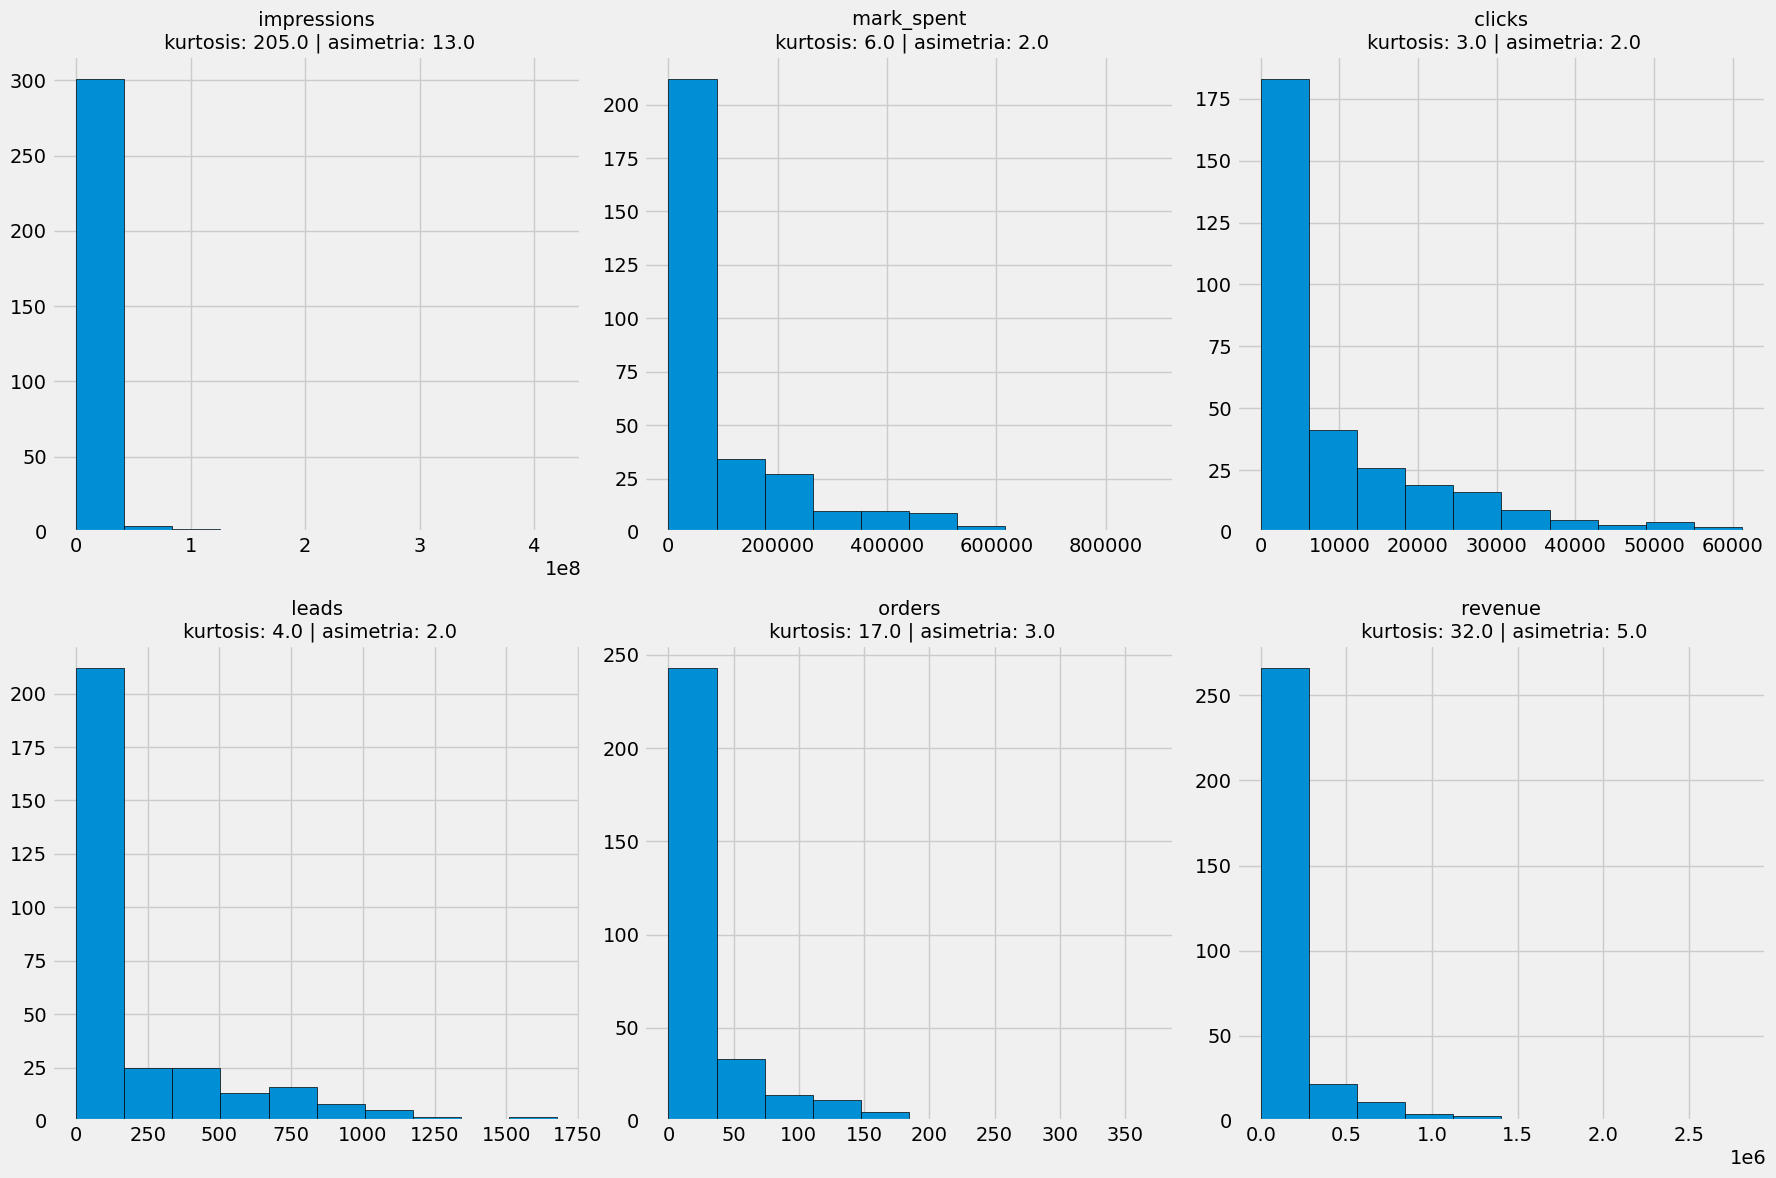

In [13]:
# Distribucion variales numericas
fig, axs = plt.subplots(2, 3, figsize = (18, 12))
axs = axs.flatten()
cols = ['impressions', 'mark_spent', 'clicks', 'leads', 'orders', 'revenue']
i = 0

for col in df1[cols].columns:
    df1[col].hist(ax = axs[i], edgecolor = 'black')
    axs[i].set_title(f' {col} \n kurtosis: {kurt[col]} | asimetria: {skew[col]}', fontsize = 14)
        
    i += 1
    
plt.tight_layout()
plt.show()

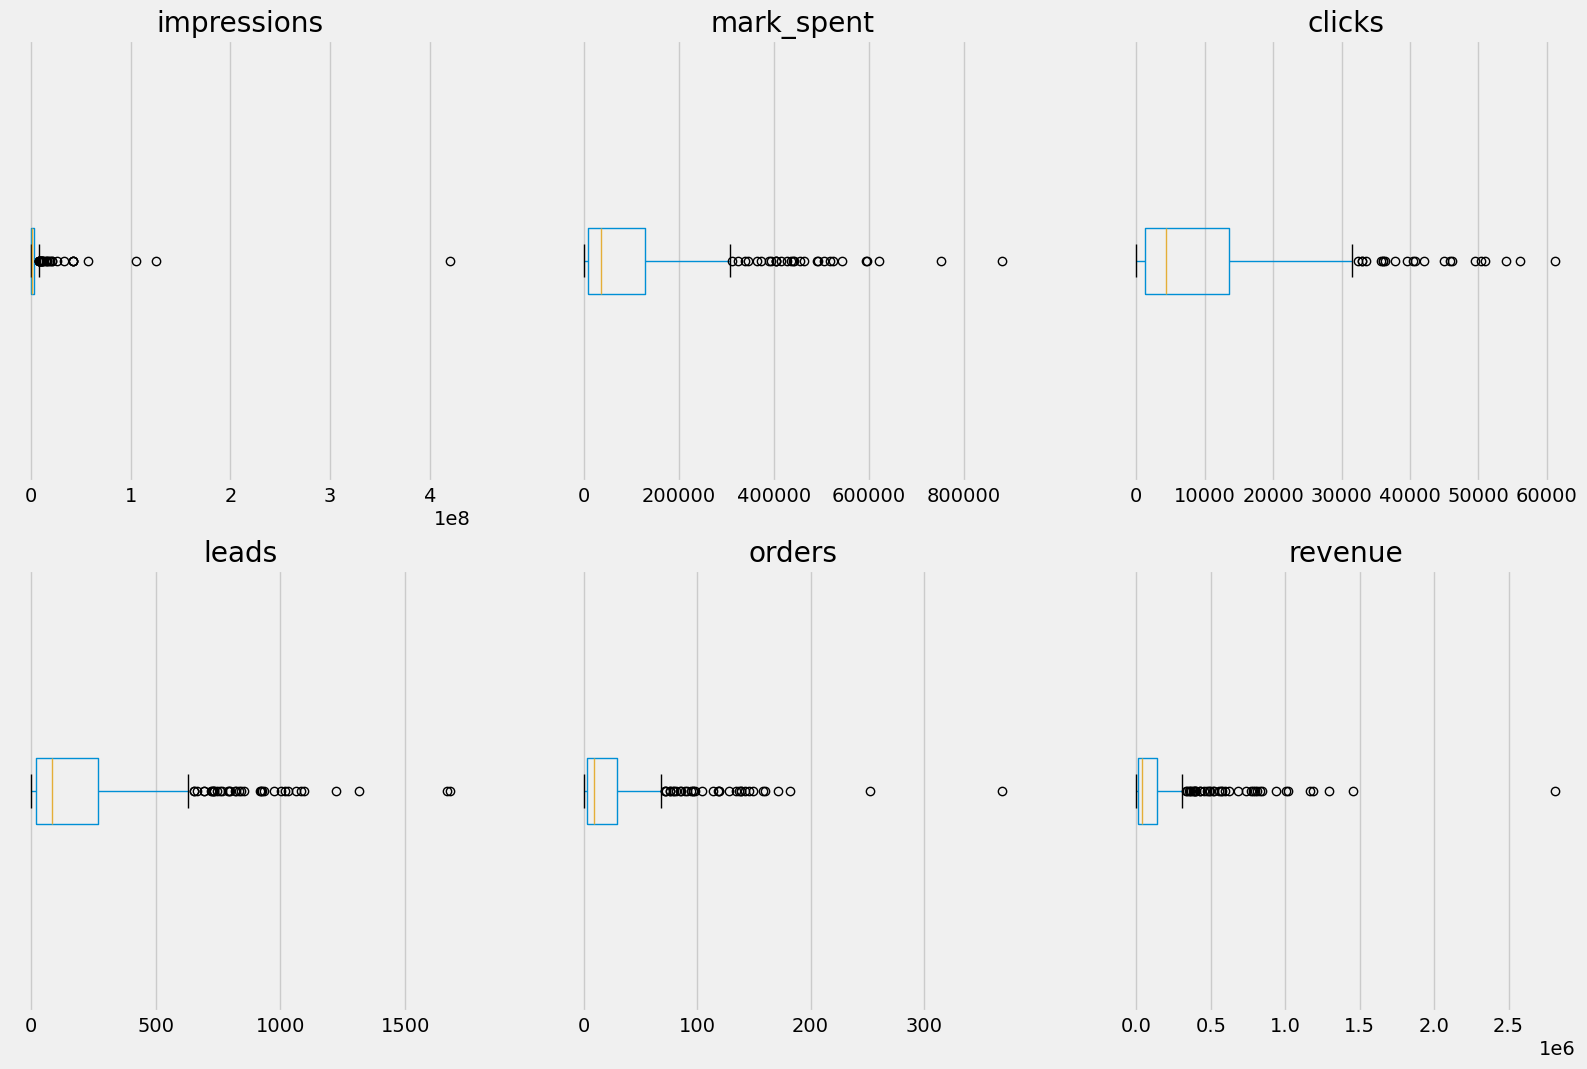

In [14]:
# Distribucion variales numericas
fig, axs = plt.subplots(2, 3, figsize = (18, 12))
axs = axs.flatten()

cols = ['impressions', 'mark_spent', 'clicks', 'leads', 'orders', 'revenue']
i = 0

for col in df1[cols].columns:
    
    df1[[col]].boxplot(ax = axs[i], vert = False)
    axs[i].set_title(f'{col}')
    axs[i].set(yticks = [])
    i += 1

Se aprecia que las variables de tipo cuantitativo presentan un gran cantidd de datas atipicos, además, estan sesgadas positivamente, con lo cual, para realizar cualquier tipo de inferencia se recomienda aplicar en este caso al ser sesgo postivo, transformacion logaritmica.

In [6]:
df1['campaign_name'] = df1['campaign_name'].str.replace('facebOOK', 'facebook')

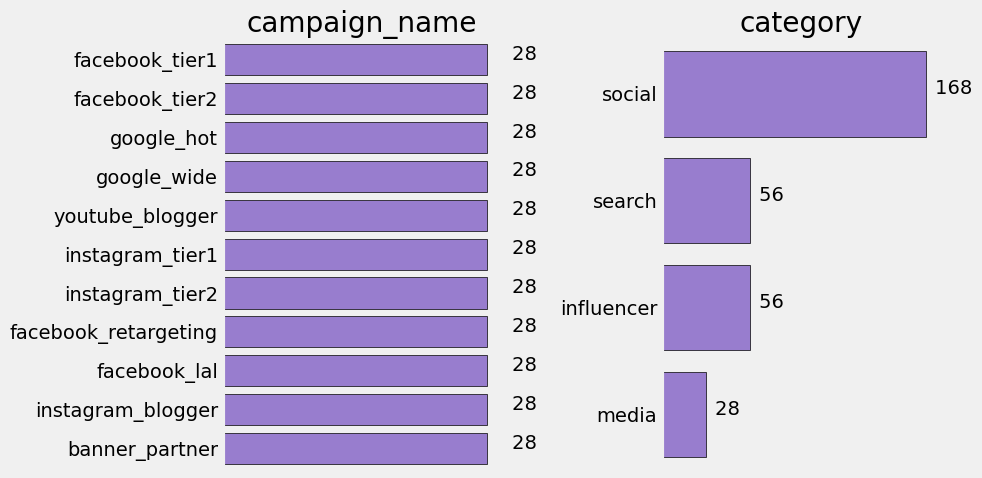

In [7]:
# Distribucion variales categorias
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
#axs = axs.flatten()

cols = ['campaign_name', 'category']
i = 0

for col in cols:
    sns.countplot(data = df1, y = col, ax = axs[i], color = 'mediumpurple', edgecolor = 'black')
    axs[i].set_title(col)
    axs[i].set(xlabel = '', ylabel = '', xticks = [])
    
    for c in axs[i].patches:
        axs[i].text(c.get_width() + 2, c.get_y() + c.get_height() / 2, f'{c.get_width() : .0f}')
    
    i += 1

 
    
    
plt.tight_layout()

In [29]:
df1.isna().any(axis = 0).sum()
df1.isna().any(axis = 1).sum()

0

In [164]:
df1.isnull().any(axis = 0).sum()

0

In [125]:
df1.duplicated().sum()

0

## Analisis Multivariado

In [17]:
cols = ['impressions', 'mark_spent', 'clicks', 'leads', 'orders', 'revenue']
np.log(df1[cols]).corr().round(2)

,impressions,mark_spent,clicks,leads,orders,revenue
impressions,1.00,0.67,0.87,0.75,0.69,0.57
mark_spent,0.67,1.00,0.81,0.91,0.95,0.85
clicks,0.87,0.81,1.00,0.88,0.83,0.71
leads,0.75,0.91,0.88,1.00,0.91,0.81
orders,0.69,0.95,0.83,0.91,1.00,0.93
revenue,0.57,0.85,0.71,0.81,0.93,1.00


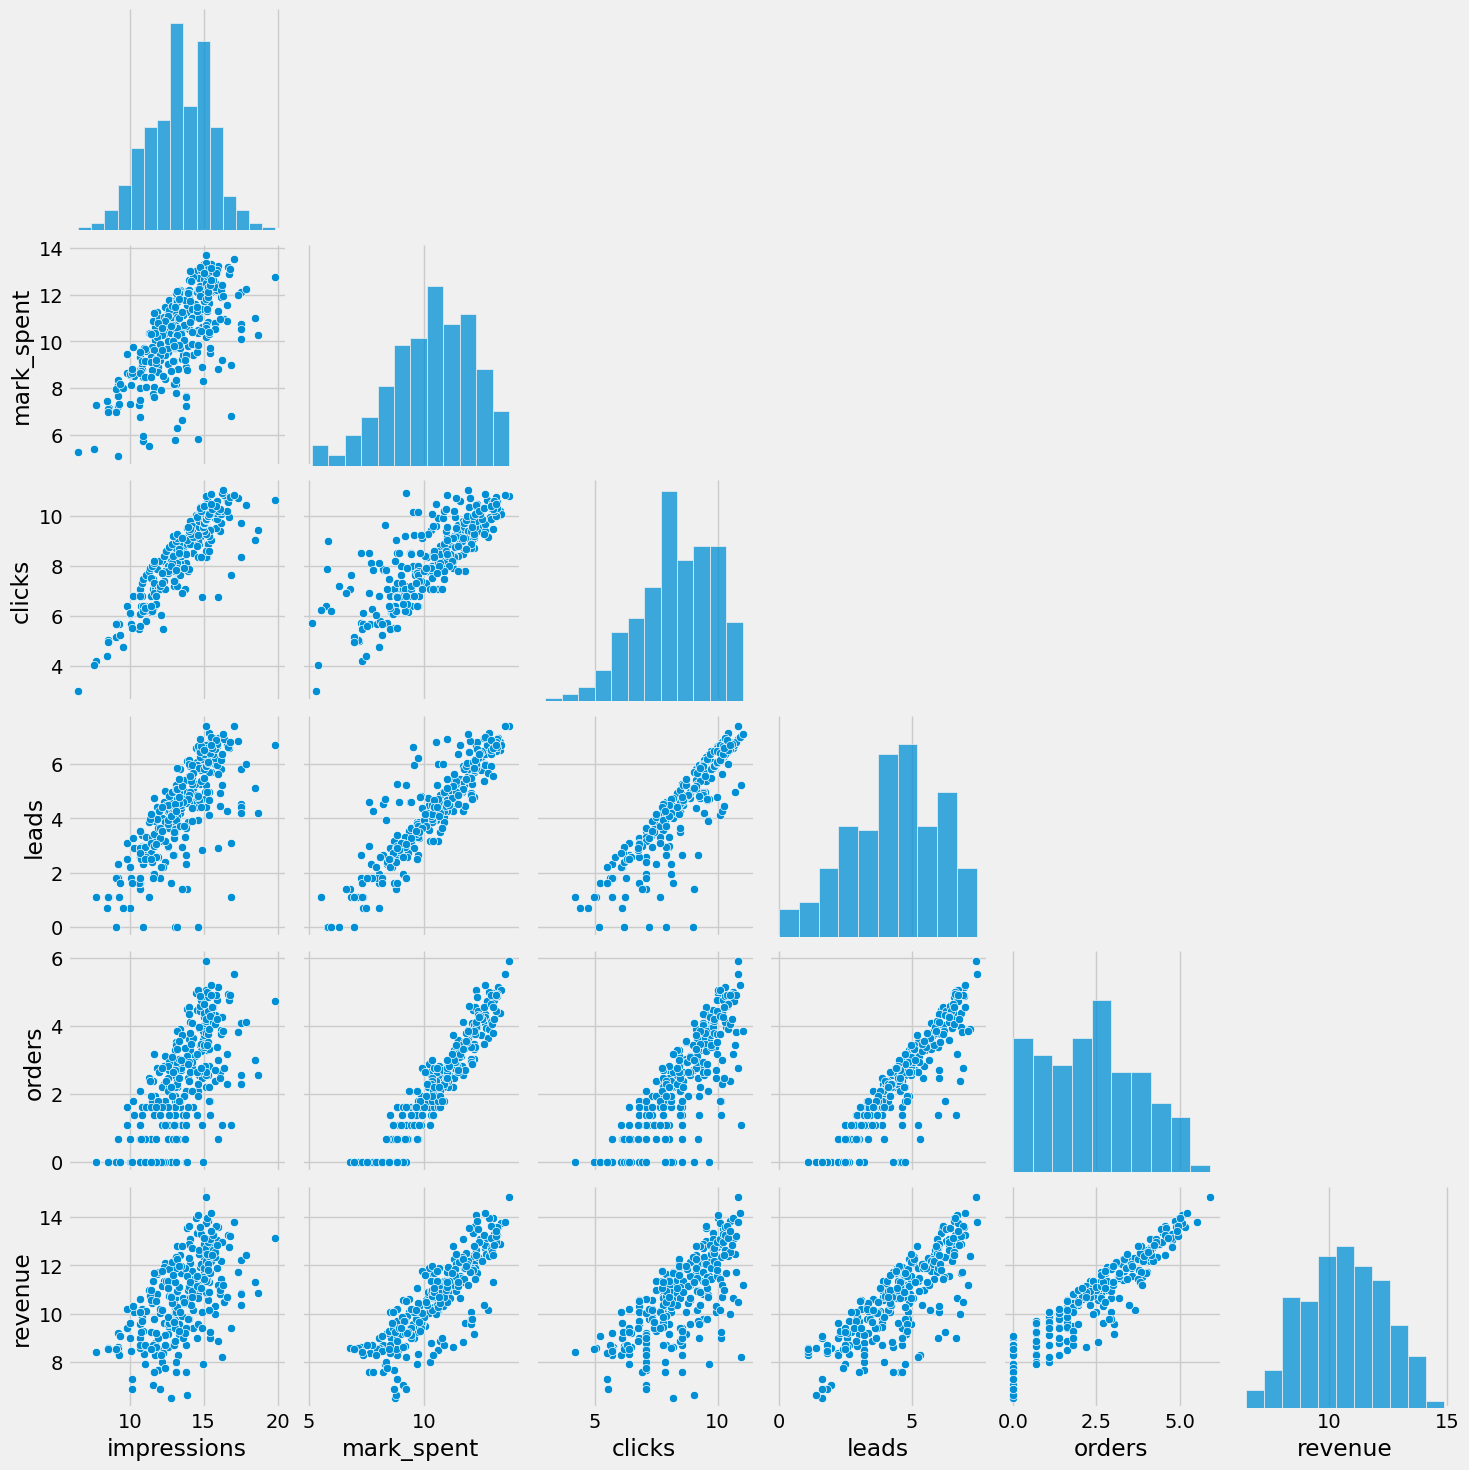

In [39]:
cols = ['impressions', 'mark_spent', 'clicks', 'leads', 'orders', 'revenue']
sns.pairplot(np.log(df1[cols]), corner = True)

Graficamente y por medio de la matriz de correlacion se determina que las variables de tipo numerico estan correlacionadas de manera positiva, tambien se evidencia que al estar aplicado una transformacion logaritmica, no se aprecia la presencia de datos atipicos ni nigun tipo de sesgo que pueda afectar en la inferencia

In [19]:
# Asimetria luego de transformar los datos
cols = ['impressions', 'mark_spent', 'clicks', 'leads', 'orders', 'revenue']
np.log(df1[cols]+1).skew()

impressions   -0.229177
mark_spent    -0.484784
clicks        -0.441182
leads         -0.316044
orders         0.189298
revenue       -2.007345
dtype: float64

In [20]:
# H0: Las variables campaign_name y category no son independientes, tienen relacion
# H1: Las variables campaign_name y category si son independientes, no tiene relacion

from scipy.stats import chi2_contingency
cols = ['campaign_name', 'category']

dt_cont = pd.crosstab(index = df1[cols[0]], columns = df1[cols[1]], margins = True)

print(f'{chi2_contingency(dt_cont)[1]}')


4.2193315256655474e-165


El p-value es menor a un nivel de significancia por tanto, existe suficiente evidencia estadistica para no rechazar la H0 e indicar que las variables no tienen relacion o son independientes

La limpieza de datos no es necesaria a profundiad, se posee una buena calidad de datos no hay valores nulos o perdidos por tanto, no es necesario tratamiento para esto, unicamente una correción para la categoria 'facebOOk' de la variable 'campaign_name' adecuar al resto de categorías; no se encuentran datos duplicados. Pero es importante aplicar una transformacion con el fin de tratar de eliminar el sesgo que puede afectar en la inferencia

# **EDA**

In [21]:
df_gr_category = df1.groupby(by = 'category').agg({'revenue' : 'sum', 'mark_spent' : 'sum'}) \
.sort_values(by = 'revenue', ascending = False).reset_index()

df_gr_category

,category,revenue,mark_spent
0,influencer,21119887,8305304.08
1,social,11911454,13798500.91
2,media,6152960,5026674.76
3,search,3705065,3460400.07


In [22]:
df_gr_category_melt = pd.melt(df_gr_category, id_vars = 'category', value_vars = ['revenue', 'mark_spent'])
df_gr_category_melt

,category,variable,value
0,influencer,revenue,21119887.00
1,social,revenue,11911454.00
2,media,revenue,6152960.00
3,search,revenue,3705065.00
4,influencer,mark_spent,8305304.08
5,social,mark_spent,13798500.91
6,media,mark_spent,5026674.76
7,search,mark_spent,3460400.07


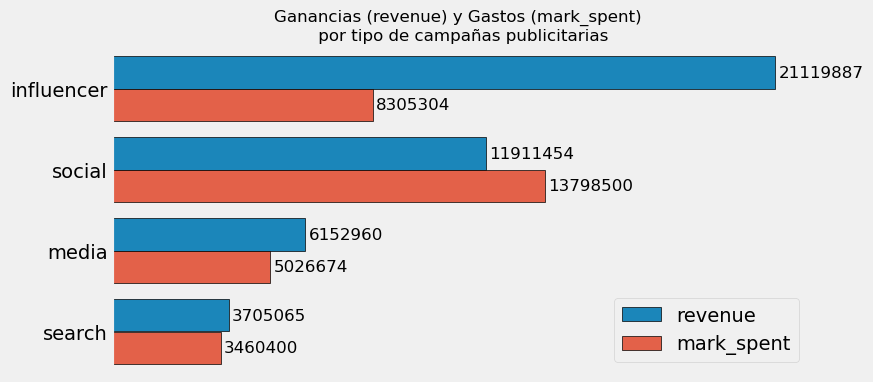

In [23]:
# Rendimiento de campañas por gastos y ganancias
plt.figure(figsize = (8,4))
ax = sns.barplot(data = df_gr_category_melt, y = 'category', x = 'value', hue = 'variable', edgecolor = 'black')
#ax.bar_label(ax.containers[0])

for i in ax.patches:
    ax.text(i.get_width() + 100000, i.get_y() + i.get_height() / 2, f'{int(i.get_width())}', size = 12, va = 'center')

ax.legend()
ax.set_title('Ganancias (revenue) y Gastos (mark_spent) \n por tipo de campañas publicitarias', fontsize = 12)
ax.set(ylabel = '', xlabel = '', xticks = [])
plt.show()

El tipo de campaña que funciona mejor, que mayores ganancias genera es campañas de tipo influenccer, mientras tanto, 'social' esta generando mas gastos y sus ganancias no superar entos gastos.

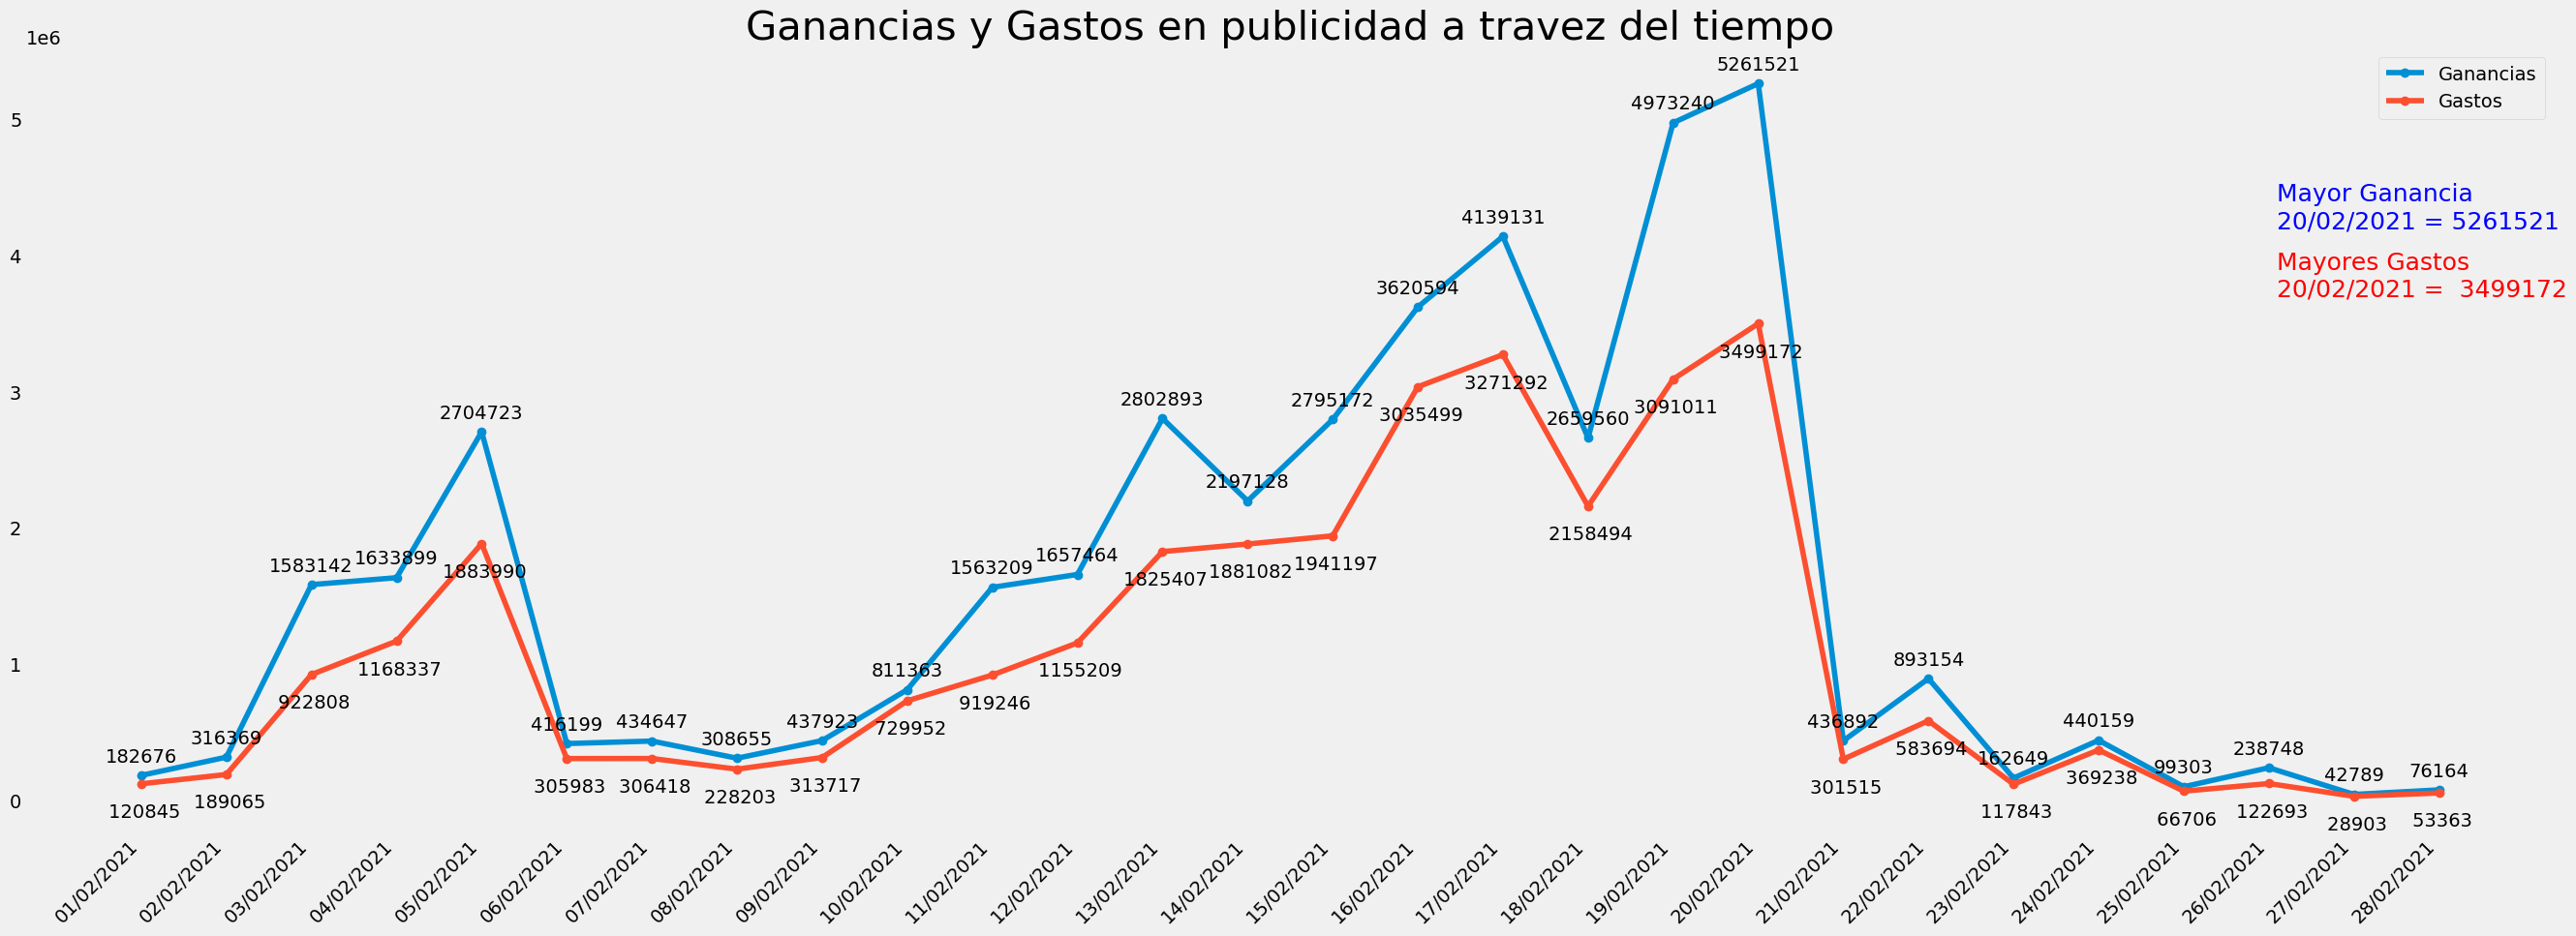

In [107]:
# Rendimieno de las campañas en el tiempo

fig, ax = plt.subplots(figsize = (30, 10))

df_group_date = df1.groupby(by = ['c_date']).agg({'revenue' : 'sum', 'mark_spent'  : 'sum'})
df_group_date.plot(marker = 'o', ax = ax)

for i in range(len(df_group_date)):
    ax.annotate(f'{df_group_date["revenue"].iloc[i]}', (i, df_group_date['revenue'].iloc[i]), xytext = (0, 10), ha = 'center', textcoords = 'offset points')
    ax.annotate(f'{df_group_date["mark_spent"].iloc[i] : .0f}', (i, df_group_date['mark_spent'].iloc[i]), textcoords = 'offset points', xytext = (0, -25), ha = 'center')

ax.text(len(df_group_date) - 3, 4200000, f' Mayor Ganancia \n {df_group_date["revenue"].idxmax()} = {df_group_date["revenue"].max()}', color = 'blue', size = 18)
ax.text(len(df_group_date) - 3, 3700000, f' Mayores Gastos \n {df_group_date["mark_spent"].idxmax()} = {df_group_date["mark_spent"].max() : .0f}', color = 'red', size = 18)

ax.set_title('Ganancias y Gastos en publicidad a travez del tiempo', fontsize = 30)
ax.set_xticks(range(len(df_group_date)))
ax.set_xticklabels(df_group_date.index, rotation=45, ha='right')
ax.set(xlabel = '')
ax.legend(['Ganancias', 'Gastos'])
ax.grid(False)
plt.show()

El 20/02/2021 se realizó una mayor inversion en la publicidad y por consiguente en esta misma fecha se obtuvieron mayores ganancias, evidenciando nuevamente un clara correlacion entre estas variables, a mayor inversion mayores ganancias.

## Tasas de conversion

In [5]:
df_group_tasa = df1.groupby(by = 'c_date').agg({'clicks' : 'sum', 'orders' : 'sum', 'impressions' : 'sum'})
df_group_tasa = df_group_tasa.assign(TC_CLICKS_ORD = ((df_group_tasa['orders'] / df_group_tasa['clicks'])*100).round(2),
                                     TC_IMP_CLICKS = ((df_group_tasa['clicks'] / df_group_tasa['impressions'])*100).round(2))

In [121]:
df_group_tasa.head(5)

,clicks,orders,impressions,TC_CLICKS_ORD,TC_IMP_CLICKS
c_date,,,,,
01/02/2021,14991,30,22803592,0.20,0.07
02/02/2021,29977,54,46221902,0.18,0.06
03/02/2021,89972,273,140541998,0.30,0.06
04/02/2021,119976,314,58853025,0.26,0.20
05/02/2021,150009,475,42506259,0.32,0.35


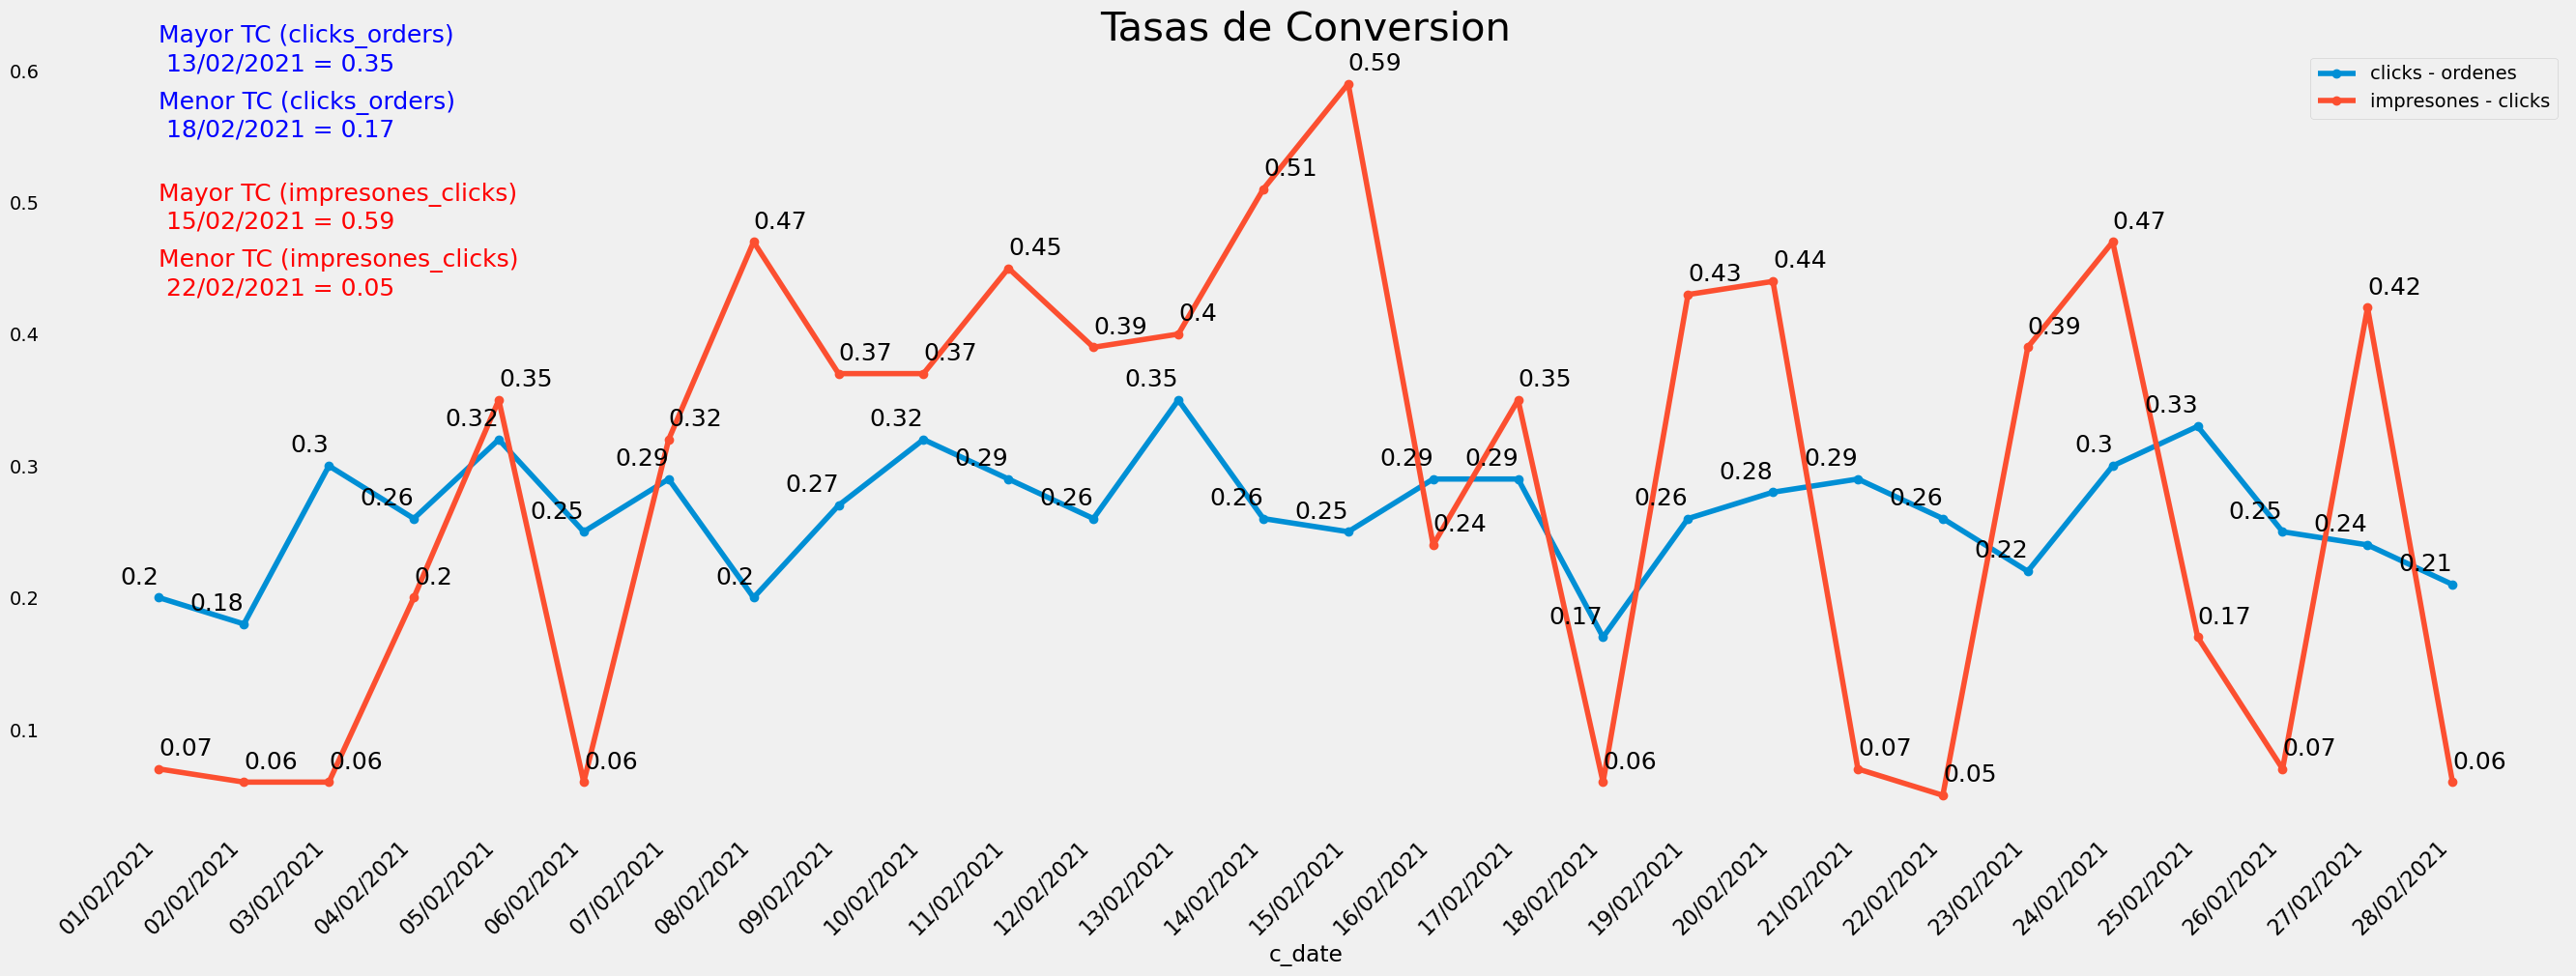

In [62]:
# Tasas de conversion

fig, ax = plt.subplots(figsize = (30, 10))
df_group_tasa[['TC_CLICKS_ORD', 'TC_IMP_CLICKS']].plot(marker = 'o', ax = ax)

for i in range(len(df_group_tasa)):
    ax.annotate(f'{df_group_tasa["TC_CLICKS_ORD"].iloc[i]}', (i, df_group_tasa['TC_CLICKS_ORD'].iloc[i]), xytext = (0, 10), textcoords = 'offset points',
                ha = 'right', size = 18)
    ax.annotate(f'{df_group_tasa["TC_IMP_CLICKS"].iloc[i]}', (i, df_group_tasa['TC_IMP_CLICKS'].iloc[i]), xytext = (0, 10), textcoords = 'offset points',
                ha = 'left', size = 18)

ax.annotate(f'Mayor TC (clicks_orders) \n {df_group_tasa["TC_CLICKS_ORD"].idxmax()} = {df_group_tasa["TC_CLICKS_ORD"].max()}', (0, 0.6), color = 'blue', size = 18)
ax.annotate(f'Menor TC (clicks_orders) \n {df_group_tasa["TC_CLICKS_ORD"].idxmin()} = {df_group_tasa["TC_CLICKS_ORD"].min()}', (0, 0.55), color = 'blue', size = 18)
ax.annotate(f'Mayor TC (impresones_clicks) \n {df_group_tasa["TC_IMP_CLICKS"].idxmax()} = {df_group_tasa["TC_IMP_CLICKS"].max()}', (0, 0.48), color = 'red', size = 18)
ax.annotate(f'Menor TC (impresones_clicks) \n {df_group_tasa["TC_IMP_CLICKS"].idxmin()} = {df_group_tasa["TC_IMP_CLICKS"].min()}', (0, 0.43), color = 'red', size = 18)


ax.set_title('Tasas de Conversion', size = 30)
ax.legend(['clicks - ordenes', 'impresones - clicks'])
ax.set_xticks(range(len(df_group_tasa)))
ax.set_xticklabels(df_group_tasa.index, rotation = 45, ha = 'right', size = 16)
ax.grid(False)

plt.show()

La tasa de conversion clicks y pedidos realizados, tiene un pico maximo el 13/02/2021 con un 0.35%, y el 18/02/2021 el pico minimo con un 0.17%.
La tasa de conversion impresiones y clicks, tiene un pico maximo el 15/02/2021 con un 0.59%, y el 22/02/221 el pico minimo con un 0.05%. Este utltimo TC, muestra que el pico maximo de interes que generaron las campañas de publicidad es de apenas del 0.59%.

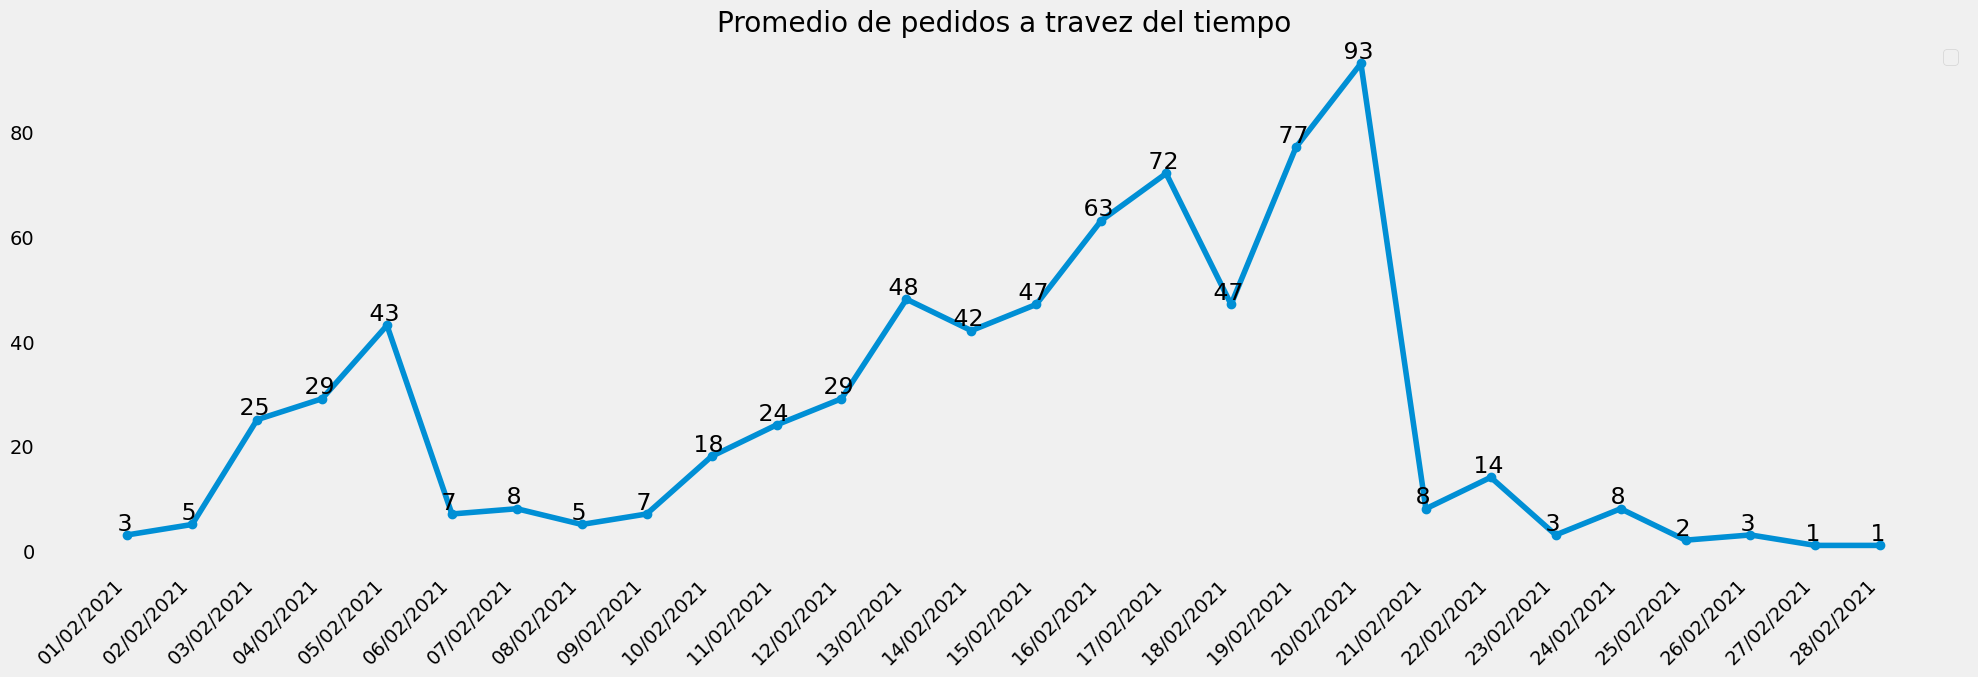

In [246]:
# Promedio de pedidos por fecha

fig, ax = plt.subplots(figsize = (20, 7))
df_group_cd_mean = df1.groupby(by = 'c_date').agg({'orders' : 'mean'}).round(0) 
df_group_cd_mean.plot(marker = 'o', ax = ax)

for i in range(len(df_group_cd_mean)):
    ax.text(i - 0.1, 1 + df_group_cd_mean['orders'].iloc[i], f'{df_group_cd_mean["orders"].iloc[i] : .0f}', ha = 'center', size = 17)


ax.set_title('Promedio de pedidos a travez del tiempo')
ax.set_xticks(range(len(df_group_cd_mean)))
ax.set_xticklabels(df_group_cd_mean.index, rotation = 45, ha = 'right')
ax.set(xlabel = '')
ax.legend('')
ax.grid(False)

plt.tight_layout()


La fecha en la que mayor se alcanzó en promedio de pedidos (93) es el 20/02/2021, esta misma fecha es en la que se realizo una mayor inversion en las campañas publicitarias y con esto tambien mayores ganancias. Proporcional, tambien, el 27 y 28 de febrero se realizaron menor cantidad de pedidos, obteniendo menos ganancias.

## Agrupamiento de campañas publicitarias basado en su eficiencia

In [247]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [248]:
df1['eficiencia'] = ((df1['revenue'] - df1['mark_spent']) / df1['mark_spent'])
df1['eficiencia_2'] = ((np.log(df1['revenue'] ) - np.log(df1['mark_spent'])) / np.log(df1['mark_spent']))

Text(0.5, 1.0, 'original_eficiencia')

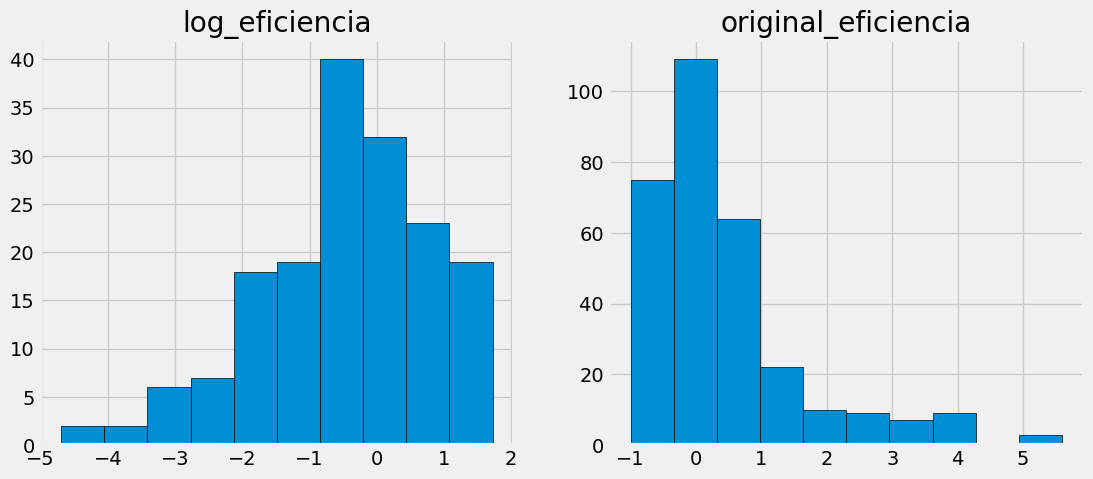

In [292]:
plt.figure(figsize = (12, 5))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.hist(np.log(df1['eficiencia']), edgecolor = 'black')
ax1.set_title('log_eficiencia')

ax2.hist(df1['eficiencia'], edgecolor = 'black')
ax2.set_title('original_eficiencia')

La serie oginal presenta un sesgo que puede llegar afectar las agrupaciones que se realizaran

In [240]:
df_eficiencia = pd.DataFrame({'Original' : [df1['eficiencia'].skew()],
                             'log_Original' : [np.log(df1['eficiencia']).skew()],
                             'log_CDU_VA' : [df1['eficiencia_2'][np.isfinite(df1['eficiencia_2'])].skew()]})
df_eficiencia

,Original,log_Original,log_CDU_VA
0,1.637171,-0.666654,-0.665033


Text(0.5, 1.0, 'Eficiencia_log_x_y')

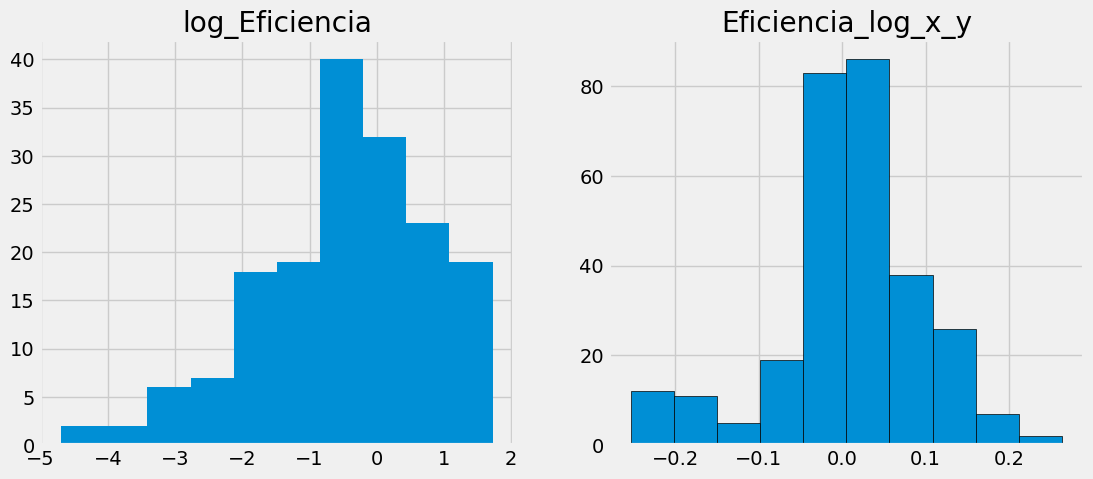

In [291]:
plt.figure(figsize = (12, 5))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.hist(np.log(df1['eficiencia']))
ax1.set_title('log_Eficiencia')
ax2.hist(df1['eficiencia_2'][np.isfinite(df1['eficiencia_2'])], edgecolor = 'black')
ax2.set_title('Eficiencia_log_x_y', edgecolor = 'black')

Se utiliza la variable 'eficiencia_2', la cual esta calculada por los logaritmos de 'mark_spent' y 'revenue', con la finalidad de eliminar el sesgo que generan la variables originales y evitar que los resultados del algoritmo de agrupamiento se vea afectado

In [251]:
# Caracteristica relevante

X = df1['eficiencia_2'][np.isfinite(df1['eficiencia_2'])].values.reshape(-1, 1)
X[:5]

array([[-0.04307838],
       [-0.00883228],
       [ 0.04955983],
       [-0.12053365],
       [ 0.10057505]])

Se realizara un agrupmento por la eficiencia

In [255]:
cd = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 1)
    kmeans.fit(X)
    cd.append(kmeans.inertia_)

Se evaluan multiples algoritmos para evaluar su efectividad 

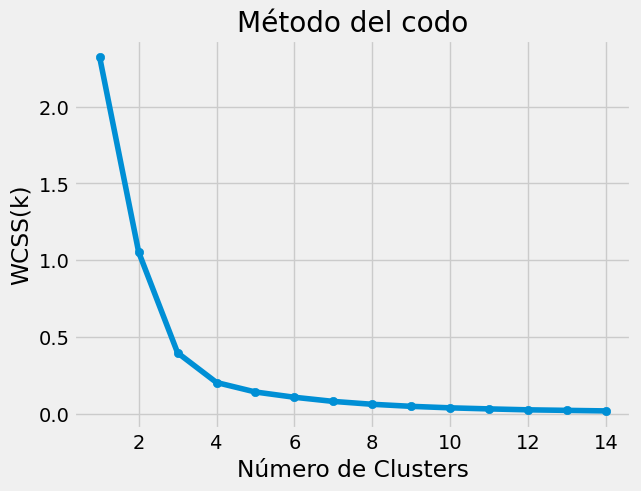

In [258]:
plt.plot(range(1,15), cd)
plt.scatter(range(1, 15), cd)
plt.title("Método del codo")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

El grafico de  codo ayuda a determinar que que el numero de cluster adecuados serian 3, a partir del cuarto se obtienen inercias o varianzas estadisticamente iguales. 

In [95]:
kmeans = KMeans(n_clusters = 3, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [109]:
df2_isfinite = df1[np.isfinite(df1['eficiencia_2'])]
df2_isfinite['revenue'] = np.log(df2_isfinite['revenue'])
df2_isfinite['Clusters'] = y_kmeans
df2_isfinite.head(5)

,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue,eficiencia,eficiencia_2,Clusters
0,01/02/2021,facebook_tier1,social,349043,148263,7307.37,1210,13,1,8.513386,-0.318359,-0.043078,2
1,01/02/2021,facebOOK_tier2,social,348934,220688,16300.20,1640,48,3,9.613269,-0.082097,-0.008832,2
2,01/02/2021,google_hot,search,89459845,22850,5221.60,457,9,1,8.984819,0.528459,0.049560,0
3,01/02/2021,google_wide,search,127823,147038,6037.00,1196,24,1,7.656337,-0.649826,-0.120534,1
4,01/02/2021,youtube_blogger,influencer,10934,225800,29962.20,2258,49,10,11.344388,1.819886,0.100575,0


<Axes: xlabel='eficiencia_2', ylabel='revenue'>

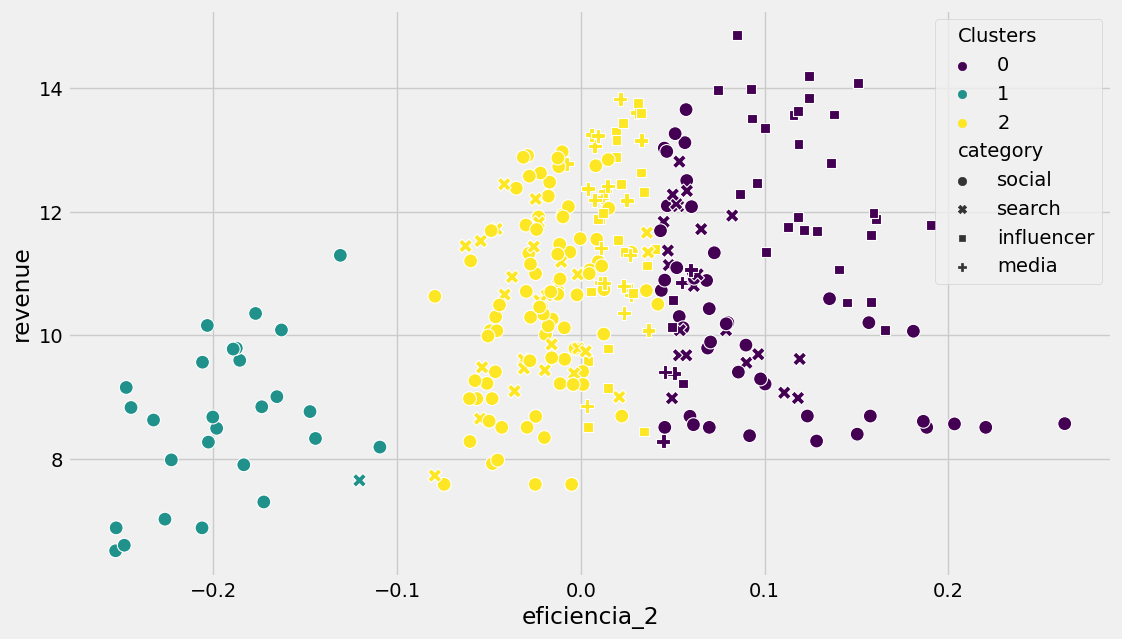

In [275]:
plt.figure(figsize = (12, 7))
sns.scatterplot(data = df2_isfinite, x = 'eficiencia_2', y = 'revenue', hue = 'Clusters', style = 'category', s = 100,  palette='viridis')

De acuerdo a los clusters generados, 3 para este problema, la mayoria de las campañas que pertenecen a las categorias de 'influencer', se agrupan en el cluster (0), tienen un mayor rendimiento de acuerdo a las ganancias generadas. Por otro lado las categorias de 'media' y 'search' se agrupan el en cluster (2), con una eficiencia o desempeño similar. El cluster (1) contienen mayoritariamente la categoria 'social', representando la caractersitica de  menor eficiencia al resto de categorias.

In [282]:
df1_cate_mark_reve = df1.groupby(by = 'category').agg({'mark_spent' : 'sum', 'revenue' : 'sum'})
df1_cate_mark_reve.assign(ROI = ((df1_cate_mark_reve['revenue'] - df1_cate_mark_reve['mark_spent']) / df1_cate_mark_reve['mark_spent']) * 100)

,mark_spent,revenue,ROI
category,,,
influencer,8305304.08,21119887,154.293964
media,5026674.76,6152960,22.406169
search,3460400.07,3705065,7.070423
social,13798500.91,11911454,-13.675739


Se podria concluir que para lograr generar iguales resultados en todas las campañas publicitarias excepto la categoria 'social', se debe incrementar la inversion, se observo con claridad que el numero de impresiones que se genera por campaña, cliks recibidos, clientes generados, ordenes realizadas y las ganancias, elevan sus números a medida que la inverion aumenta. De acuerdo a las agrupaciones, la categoria 'social' presenta un menor eficiencia, se necesita optimizar para proximas campañas debido a que las ganancias generadas no superan a la inversion que se le realiza. Por ultimo, las campañas de tipo 'social' estan generando perdidas y conciderar si es mejor continuar con este tipo de campañas y dirigir la inversion que se la realiza a las campañas que mayor retorno de inverion generan como lo es 'influencer'.